In [1]:
### Desa Bolger and Emma Beyer
### Add more info here, email address etc.

#The goal of this document is to process the data into something that will be workable. 


#Read in the packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point



In [2]:
#DOWNLOAD WRECKS DATA

#Read the CSV into a Pandas dataframe
WrecksFile = gpd.read_file('../Data/Raw/Wrecks_and_Obstructions.shp')
WrecksFile.head()

#Get Coordinate System
print("Current CRS:", WrecksFile.crs)
WrecksFile = WrecksFile.to_crs("EPSG:4326")
WrecksFile.to_file("../Data/Processed/Wrecks_wgs1984.shp")
print("Current CRS:", WrecksFile.crs) #good


#Reveal the columns
WrecksFile.columns

Current CRS: EPSG:3857
Current CRS: EPSG:4326


Index(['positionqu', 'objectname', 'objectcate', 'yearsunk', 'comment',
       'datasource', 'sourcereco', 'objectid', 'sourcedate', 'geometry'],
      dtype='object')

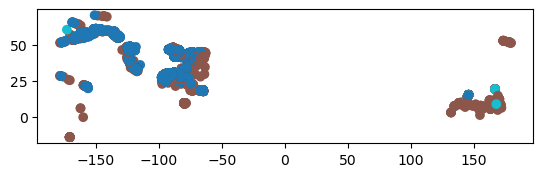

In [3]:
#PLOT WRECKS DATA
WrecksFile.plot(column = 'objectcate');

In [4]:
#DOWNLOAD EEZ DATA

#Read the CSV into a Pandas dataframe
EEZFile = gpd.read_file('../Data/Raw/eez.shp')
EEZFile.head()

#Get Coordinate System
print("Current CRS:", EEZFile.crs)
EEZFile = EEZFile.to_crs("EPSG:4326")
EEZFile.to_file("../Data/Processed/EEZ_wgs1984.shp")
print("Current CRS:", EEZFile.crs) #good

#Reveal the columns
EEZFile.columns

Current CRS: EPSG:4326
Current CRS: EPSG:4326


Index(['mrgid', 'geoname', 'mrgid_ter1', 'pol_type', 'mrgid_sov1',
       'territory1', 'iso_ter1', 'sovereign1', 'mrgid_ter2', 'mrgid_sov2',
       'territory2', 'iso_ter2', 'sovereign2', 'mrgid_ter3', 'mrgid_sov3',
       'territory3', 'iso_ter3', 'sovereign3', 'x_1', 'y_1', 'mrgid_eez',
       'area_km2', 'iso_sov1', 'iso_sov2', 'iso_sov3', 'un_sov1', 'un_sov2',
       'un_sov3', 'un_ter1', 'un_ter2', 'un_ter3', 'geometry'],
      dtype='object')

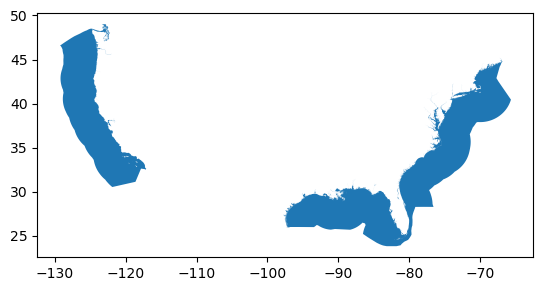

In [5]:
#PLOT EEZ DATA
EEZFile.plot(column = 'territory1');

In [7]:
#DOWNLOAD NC DATA

#Read the CSV into a Pandas dataframe
NCStateFile = gpd.read_file('../Data/Raw/NCcounty.shp')
NCStateFile.head()

#Get Coordinate System
print("Current CRS:", NCStateFile.crs) #good
NCStateFile.to_file("../Data/Processed/NC_wgs1984.shp")


#Reveal the columns
NCStateFile.columns

Current CRS: EPSG:4326


Index(['FIPS', 'CountyName', 'UpperCount', 'SapCountyI', 'DOTDistric',
       'DOTDivisio', 'SAP_CNTY_N', 'CNTY_NBR', 'DSTRCT_NBR', 'DIV_NBR', 'NAME',
       'SHPNumber', 'WATER', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

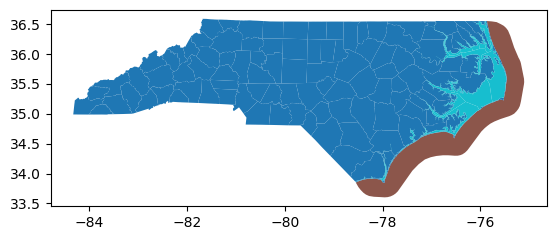

In [9]:
#PLOT NC DATA
NCStateFile.plot(column = 'WATER');

In [34]:
#DOWNLOAD TIF DATA FOR BATHYMETRY

#bathymetry = georaster.MultiBandRaster('../Data/Raw/BathymetryRaw.shp')
                                       
#access file
#data = bathymetry.r

#cant get it to install a TIF reader....

NameError: name 'georaster' is not defined

In [77]:
#check coordinate systems
NCState.crs == EEZFile.crs #True
WrecksFile.crs == EEZFile.crs #True
WrecksFile.crs == NCState.crs #True

#All shapefiles are WGS1984.

True

In [ ]:
#I want to fit wrecks to US EEZ

#Intersect the two dataframes
EEZwrecks = gpd.overlay(
    df1 = WrecksFile, 
    df2 = EEZFile, 
    how = 'intersection')

#Plot
EEZwrecks.plot();